### Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


### Load the dataset

In [17]:
data = pd.read_csv('FinalDataset.csv')
data.head()

,Start Timestamp,End Timestamp,Mean,Max,Standard Deviation,RMS,Kurtosis,Skewness,Peak-to-Peak,Abs Diff Signal,...,FFT_116,FFT_117,FFT_118,FFT_119,FFT_120,FFT_121,FFT_122,FFT_123,FFT_124,Label
0,0.012,0.989,-1.94008,26.53,30.120589,30.183006,3.609067,-1.923705,136.84,204.03,...,264.376924,295.345862,336.737483,393.824387,469.955157,585.479846,775.534162,1138.207589,1954.867013,0
1,0.497,1.490,-2.23216,20.56,8.163469,8.463142,0.661358,1.322351,30.28,38.80,...,49.915725,55.452187,63.361122,74.665352,90.848103,112.943277,155.706170,249.347067,614.890518,0
2,0.989,1.992,-1.69672,6.39,5.572750,5.825324,-1.492188,-0.085436,16.11,16.61,...,36.144891,40.262516,45.270429,53.865685,65.215566,80.490928,107.661839,166.661235,417.672556,0
3,1.490,2.486,5.03216,7.02,2.371238,5.562859,0.101943,-1.152768,8.30,9.45,...,16.814762,19.890015,22.285721,27.086053,31.336451,38.970047,55.366783,75.773360,167.894435,0
4,1.992,2.977,6.19720,7.02,0.733511,6.240459,-0.985350,-0.624499,2.34,3.57,...,3.617411,4.559092,4.741178,5.990614,7.031352,9.001152,12.678156,20.795149,57.165102,0


### Balancing the dataset

In [3]:
from sklearn.utils import resample

label_counts = data.Label.value_counts()
# Find the minimum count
min_count = label_counts.min()

# Create an empty DataFrame to store balanced data
balanced_df = pd.DataFrame()

# Iterate over each label
for label in label_counts.index:
    # Sample the data for the current label to make its count equal to min_count
    sampled_data = resample(data[data['Label'] == label], replace=False, n_samples=min_count, random_state=42)
    # Append the sampled data to the balanced DataFrame
    balanced_df = pd.concat([balanced_df, sampled_data])

# Shuffle the balanced DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the value counts to verify the balance
print("Previous Dataset label spread\n", data['Label'].value_counts())
print("New Dataset label spread\n", balanced_df['Label'].value_counts())

data = balanced_df

Previous Dataset label spread Label
0    760
1    738
3    687
2    684
Name: count, dtype: int64
New Dataset label spread Label
1    684
3    684
0    684
2    684
Name: count, dtype: int64


### Separate features and target variable

In [4]:
X = data.drop(columns=["Label"])  # Assuming "Label" column is the target variable
y = data["Label"]

### Split the data into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Initialize the Random Forest Classifier

In [6]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

### Train the classifier

In [7]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predictions

In [8]:
y_pred = rf_classifier.predict(X_test)

### Evaluate the classifier

Accuracy Score: 0.5656934306569343

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.58      0.57       141
           1       0.57      0.52      0.54       142
           2       0.61      0.52      0.56       142
           3       0.53      0.65      0.59       123

    accuracy                           0.57       548
   macro avg       0.57      0.57      0.57       548
weighted avg       0.57      0.57      0.56       548



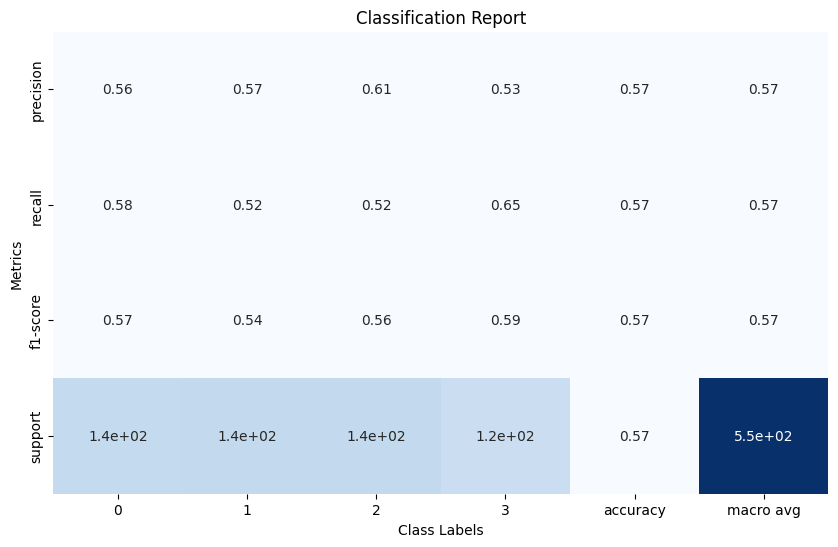

In [13]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Convert classification report to dataframe
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot classification report heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Class Labels')
plt.ylabel('Metrics')
plt.title('Classification Report')
plt.show()

Confusion Matrix:
 [[82 16 14 29]
 [21 74 22 25]
 [28 24 74 16]
 [16 16 11 80]]


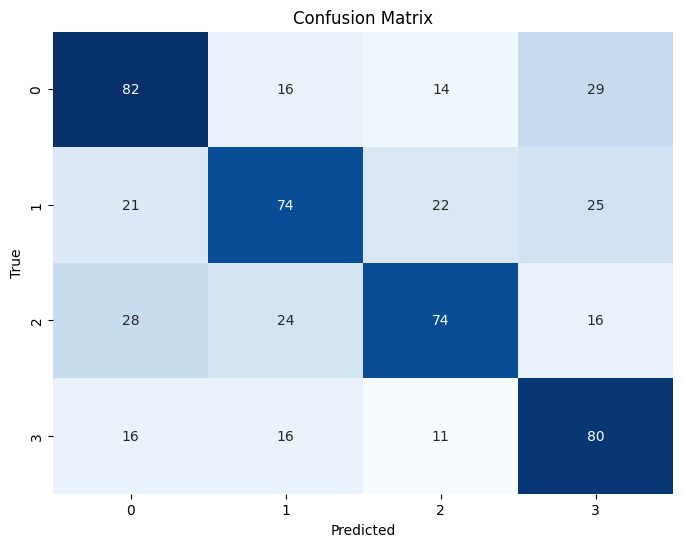

In [15]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


# Plotting confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Saving the Model

In [10]:
from joblib import dump

# Specify the file path where you want to save the model
model_file_path = "EEGCLASSIFIER.joblib"

# Save the model to the specified file path
dump(rf_classifier, model_file_path)

print("Model saved successfully.")


Model saved successfully.


### Feature importance

                Feature  Importance
114              FFT_99    0.025129
41               FFT_26    0.025116
115             FFT_100    0.021906
40               FFT_25    0.020572
4    Standard Deviation    0.020342
..                  ...         ...
87               FFT_72    0.002499
101              FFT_86    0.002484
69               FFT_54    0.002416
58               FFT_43    0.002361
12          Gamma Power    0.002334

[140 rows x 2 columns]


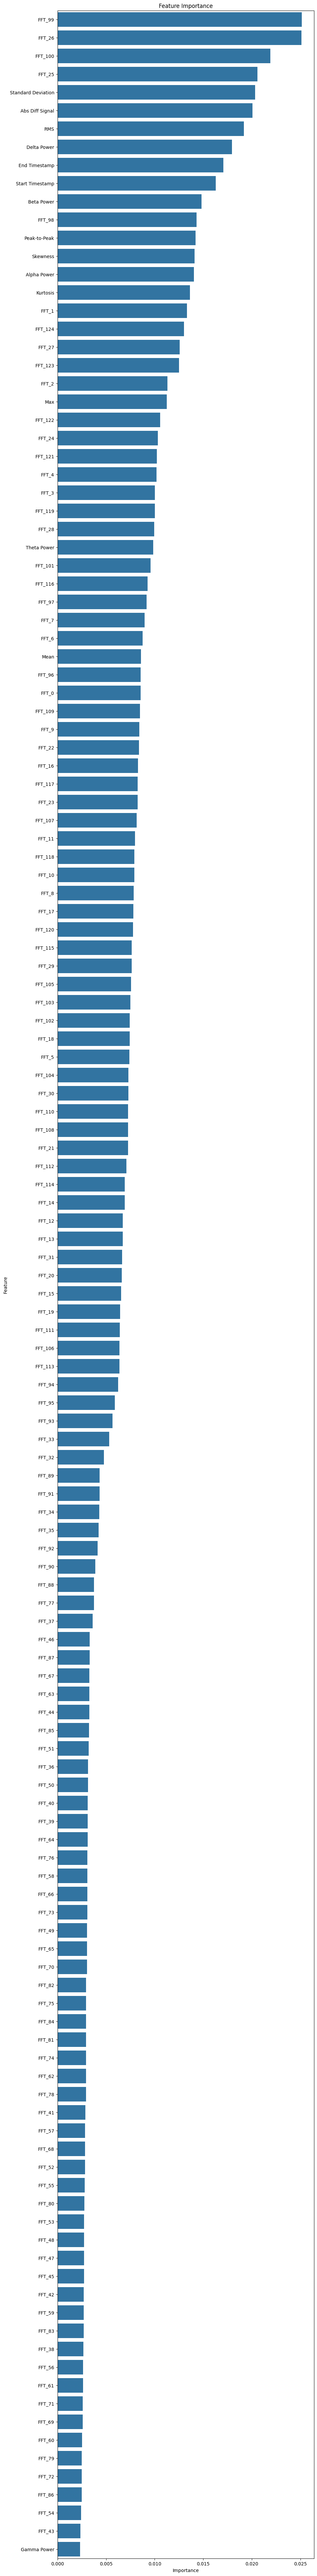

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importances = rf_classifier.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 100))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
